# Data Science Workshop

## Cloropleth Challenge

This notebook was created to participe for one of the scholarships for the Data Science Workshop from __FABLAB YUCATAN__.

The cloropleth works the Marginalization Data provided for the National Council of Population in México (CONAPO - Consejo Nacional de Población in spanish).

Particularly, the challenge encourage us to work with the info related with the Yucatán State.

### Step 1. Load the GeoDataFrame

In [697]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

Import the module for work with geografic info.

In [698]:
import geopandas as gpd

In [699]:
# set the filepath and load in a shapefile
fp = "conabio/Muni_2012gw.shp"
map_df = gpd.read_file(fp)

The shape file has spatial and no-spatial info. In the following table I describe the no-spatial info.


| Atributo   | Descripción |   Fuente   |  Dominio   |
| ---------- | ----------  | ---------- | ---------- |
| CVE_ENT    | Carácter    |   INEGI    | Clave de la entidad
| CVE_MUN    | Carácter    |   INEGI    | Clave del municipio
| NOM_MUN	 | Carácter	   |   INEGI	| Nombre del municipio |
| OID_1	     | Carácter	   |   INEGI	| Identificador del rasgo |



In [700]:
# Filter the info in the geo dataframe only with the related with Yucatán
yucatan_state_id = "31"
where_state_is_yucatan = map_df["CVE_ENT"] == yucatan_entity_id
map_df = map_df[where_state_is_yucatan]

In [701]:
# Check data type. Verify if is a geo dataframe
map_df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,geometry
2283,31,021,Chichimilá,2284,2284,2285,POLYGON ((-88.18234865874395 20.64874705235748...
2284,31,023,Chocholá,2285,2285,2286,POLYGON ((-89.85061321597095 20.82474182698858...
2285,31,069,Sotuta,2286,2286,2287,POLYGON ((-88.89326656656229 20.72815158868561...
2286,31,068,Sinanché,2287,2287,2288,POLYGON ((-89.16306232871217 21.30750568567412...
2287,31,067,Seyé,2288,2288,2289,POLYGON ((-89.37792027679875 20.94139101245184...


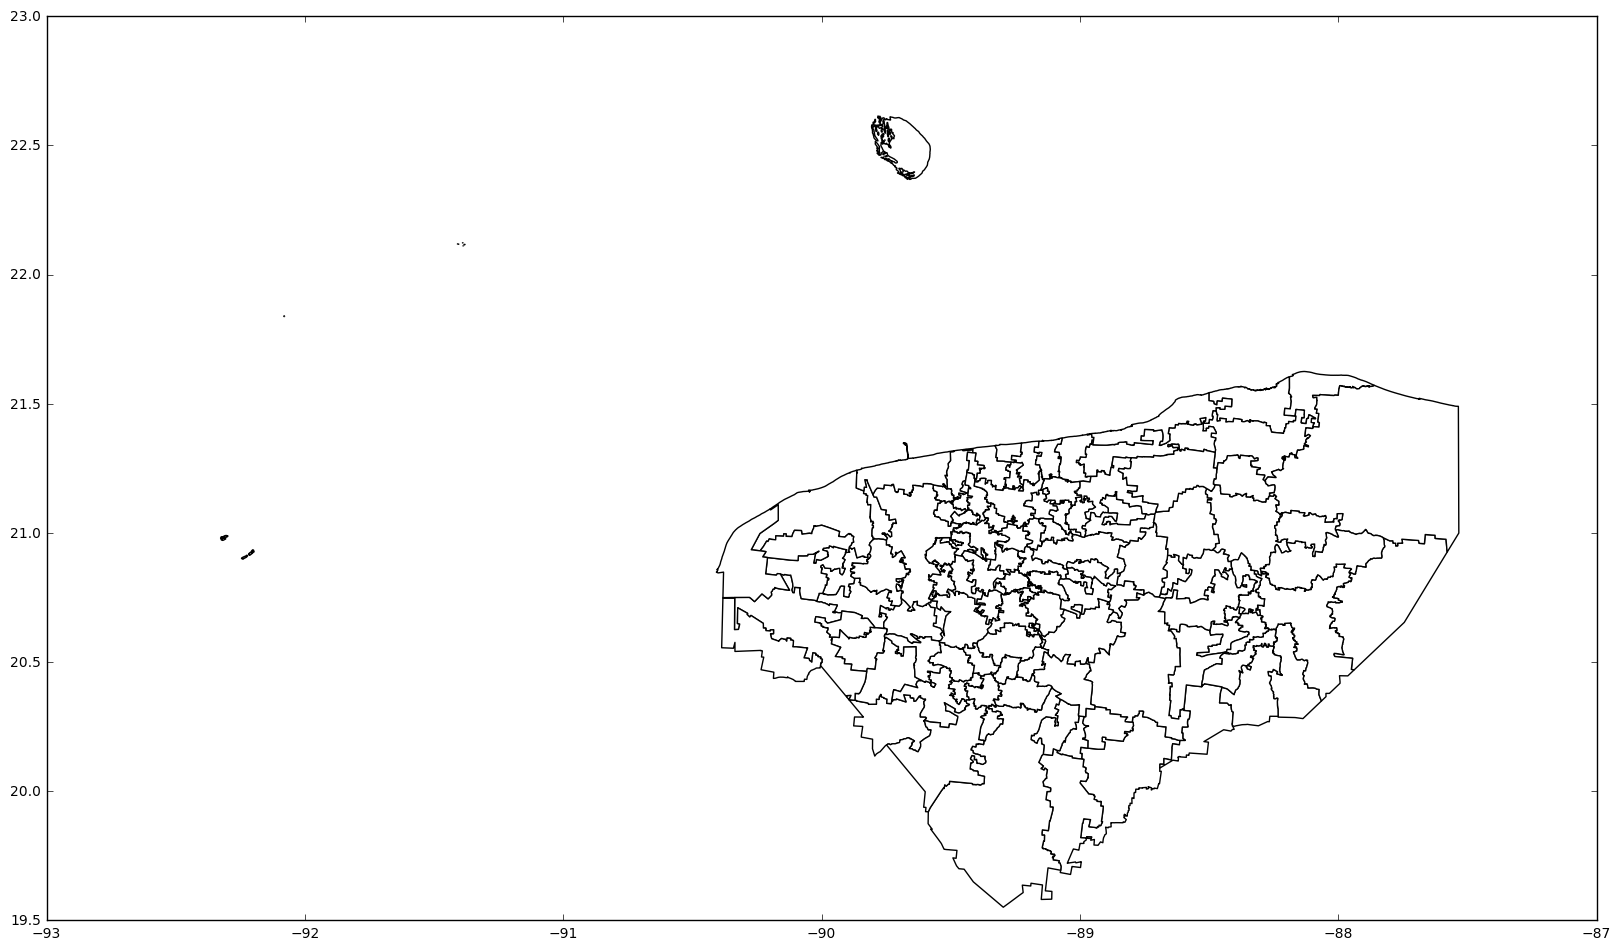

In [702]:
map_df.plot(color="white", figsize=(20, 20), alpha=1.0, edgecolor='k')

Print the shape of the info.

In [703]:
map_df.shape

(106, 7)

### Step 2. Load the CONAPO CSV

The first step is read the CONAPO csv, for do this, I provide a different encoding type, because the default (UTF-8) gave some problems.

This enconding is necessary for process the accents.

In [718]:
df = pd.read_csv("data_CONAPO_municipal_90-15.csv", encoding="iso-8859-3")

Next I describe some of the fields in the CSV:

1. __CVE_ENT__: State id
2. __ENT__: State name
3. __CVE_MUN__: Borough id
4. __MUN__: Borough name
5. __POB_TOT__: Total population
6. __ANALF__: Percentage of illiterate population aged 15 or older 
7. __OVSEE__: Percentage of the population without electricity
8. __OVSAE__: Percentage of the population without without water supply
9. __IM__: Index of marginalization

The next step is to slice the data that we are going to use and rename them.

In [719]:
df = df[[
        "CVE_ENT",
        "ENT",
        "CVE_MUN",
        "MUN",
        "POB_TOT",
        "ANALF",
        "OVSEE",
        "OVSAE",
        "IM"]]

In [720]:
df = df.rename(index=str, columns={
        "CVE_ENT": "state_id",
        "ENT": "state_name",
        "CVE_MUN": "borough_id",
        "MUN": "borough_name",
        "POB_TOT": "total_population",
        "ANALF": "illiteracy_percentage",
        "OVSEE": "population_no_electricity_percentage",
        "OVSAE": "population_no_water_supply_percentage",
        "IM": "marginalization_index"
    }
)
# check dat dataframe
df.head()

,state_id,state_name,borough_id,borough_name,total_population,illiteracy_percentage,population_no_electricity_percentage,population_no_water_supply_percentage,marginalization_index
0,1,Aguascalientes,1001,Aguascalientes,877190,2.06,0.16,0.72,-1.676
1,1,Aguascalientes,1001,Aguascalientes ...,797010,2.59,0.31,0.77,-1.768
2,1,Aguascalientes,1001,Aguascalientes,723043,3.19,0.54,1.54,-1.831
3,1,Aguascalientes,1001,Aguascalientes,643419,3.86,1.12,0.88,-1.871
4,1,Aguascalientes,1001,Aguascalientes,582827,4.53,1.62,1.14,-1.735


In [721]:
df.shape

(14646, 9)

Once the file has been read and the information divided, we filter the info, selecting the rows that match with the __state id of Yucatán__.

In [722]:
# A query is necessary
where_state_is_yucatan = df["state_id"] == yucatan_state_id
data_for_cloropleth = df[where_state_is_yucatan]
data_for_cloropleth.head()

,state_id,state_name,borough_id,borough_name,total_population,illiteracy_percentage,population_no_electricity_percentage,population_no_water_supply_percentage,marginalization_index
13662,31,Yucatán,31050,Mérida,892363,2.78,0.34,1.17,-1.477
13663,31,Yucatán,31050,Mérida ...,830732,3.27,0.58,1.3,-1.547
13664,31,Yucatán,31050,Mérida,781146,3.82,0.72,1.7,-1.529
13665,31,Yucatán,31050,Mérida,705055,4.52,1.32,2.63,-1.572
13666,31,Yucatán,31050,Mérida,649770,5.37,2.02,8.87,-1.43


In [723]:
data_for_cloropleth.shape

(636, 9)

We can watch that are more rows that we expected. Yucatán has only 106 boroughs, so ist clear that are duplicated info. 


In [724]:
# Remove duplicated rows 
data_for_cloropleth = data_for_cloropleth.drop_duplicates(subset='borough_id')
data_for_cloropleth.head()

,state_id,state_name,borough_id,borough_name,total_population,illiteracy_percentage,population_no_electricity_percentage,population_no_water_supply_percentage,marginalization_index
13662,31,Yucatán,31050,Mérida,892363,2.78,0.34,1.17,-1.477
13668,31,Yucatán,31041,Kanasín,96317,5.45,0.61,2.02,-0.953
13669,31,Yucatán,31102,Valladolid,80313,12.61,1.93,2.14,0.089
13671,31,Yucatán,31096,Tizimín,77621,12.49,2.98,3.71,0.245
13678,31,Yucatán,31059,Progreso,59122,3.53,0.49,1.93,-1.058


In [725]:
data_for_cloropleth.shape

(106, 9)

Next, we saw that map dataframe has a column called __CVE_MUN__, that represents the same borough id. Yep, it's correct, is the same info in __borough_id__ column in __data_for_cloropleth__ dataframe, but has a tiny difference, it has the __yucatan_state_id__ as prefix, so we need to remove it from all the rows. 

In [726]:
new_cve_mun = [cve[2:] for cve in data_for_cloropleth["borough_id"]]

In [727]:
# Drop the column to replace
data_for_cloropleth.drop(["borough_id"], axis=1)
data_for_cloropleth["borough_id"] = new_cve_mun
data_for_cloropleth.head()

,state_id,state_name,borough_id,borough_name,total_population,illiteracy_percentage,population_no_electricity_percentage,population_no_water_supply_percentage,marginalization_index
13662,31,Yucatán,050,Mérida,892363,2.78,0.34,1.17,-1.477
13668,31,Yucatán,041,Kanasín,96317,5.45,0.61,2.02,-0.953
13669,31,Yucatán,102,Valladolid,80313,12.61,1.93,2.14,0.089
13671,31,Yucatán,096,Tizimín,77621,12.49,2.98,3.71,0.245
13678,31,Yucatán,059,Progreso,59122,3.53,0.49,1.93,-1.058


The __state id__ will not be useful anymore, so we can drop the column.

In [728]:
data_for_cloropleth = data_for_cloropleth.drop(["state_id"], axis=1)
data_for_cloropleth.head()

,state_name,borough_id,borough_name,total_population,illiteracy_percentage,population_no_electricity_percentage,population_no_water_supply_percentage,marginalization_index
13662,Yucatán,050,Mérida,892363,2.78,0.34,1.17,-1.477
13668,Yucatán,041,Kanasín,96317,5.45,0.61,2.02,-0.953
13669,Yucatán,102,Valladolid,80313,12.61,1.93,2.14,0.089
13671,Yucatán,096,Tizimín,77621,12.49,2.98,3.71,0.245
13678,Yucatán,059,Progreso,59122,3.53,0.49,1.93,-1.058


Apply a cast to the fields for avoid type issues.

In [729]:
data_for_cloropleth[["total_population"]] = data_for_cloropleth[["total_population"]].astype(float)
data_for_cloropleth[["illiteracy_percentage"]] = data_for_cloropleth[["illiteracy_percentage"]].astype(float)
data_for_cloropleth[["population_no_electricity_percentage"]] = data_for_cloropleth[["population_no_electricity_percentage"]].astype(float)
data_for_cloropleth[["population_no_water_supply_percentage"]] = data_for_cloropleth[["population_no_water_supply_percentage"]].astype(float)
data_for_cloropleth[["marginalization_index"]] = data_for_cloropleth[["marginalization_index"]].astype(float)

### Step 3. Merge the geo info and the cleaned CONAPO dataset.

In [730]:
merged = map_df.set_index("CVE_MUN").join(data_for_cloropleth.set_index("borough_id"))

### Step 4. Plot the cloropleth

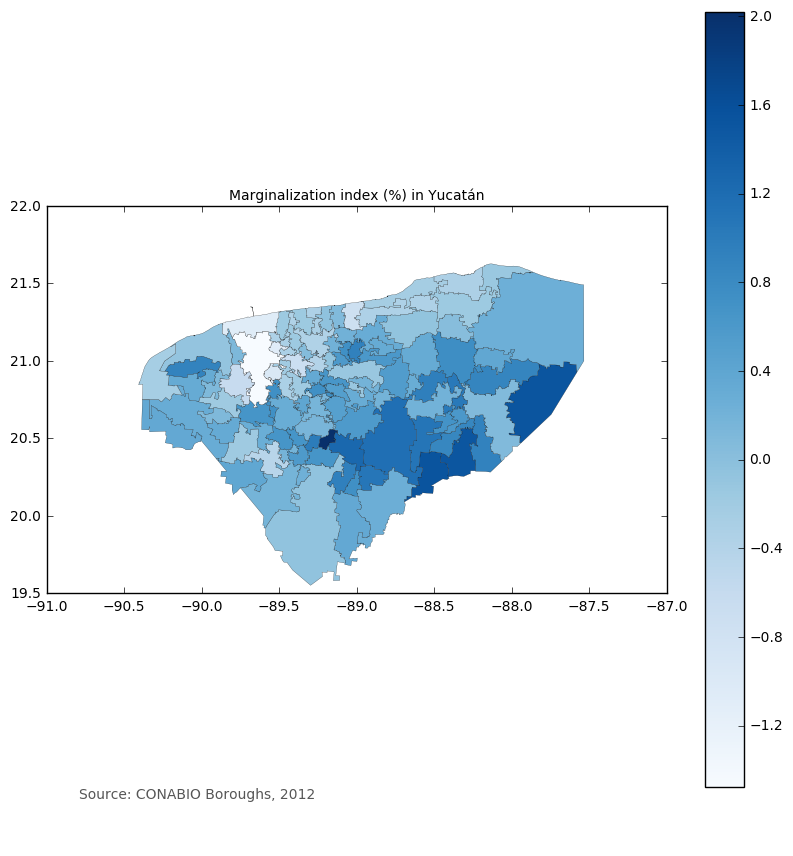

In [731]:
# set a variable that will call whatever column we want to visualise on the map
variable = "marginalization_index"

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))


# add a title
title = "{0} (%)".format(variable.replace("_", " "))
ax.set_title("{0} in Yucatán".format(title.capitalize()), 
             fontdict={"fontsize": "10", 
                       "fontweight": "1"})
# create an annotation for the data source
ax.annotate("Source: CONABIO Boroughs, 2012", 
            xy=(0.1, .08), 
            xycoords="figure fraction", 
            horizontalalignment="left", 
            verticalalignment="top", 
            fontsize=10, color="#555555")

# Set axes limits
ax.set_xlim([-91, -87])
ax.set_ylim([19.5,22])

# set the range for the choropleth legend
vmin = min(data_for_cloropleth[variable])
vmax = max(data_for_cloropleth[variable])

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap="Blues", linewidth=0.15, ax=ax)